# ARAMA AND SEASONAL ARIMA

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
df=pd.read_csv("perrin freres monthly champagne.csv")

In [3]:
df.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [4]:
df.tail()

,Month,Sales
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [5]:
df.drop(104,axis=0,inplace=True)

In [6]:
df.tail()

,Month,Sales
99,1972-04,4788
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413


In [7]:
df['Month']=pd.to_datetime(df['Month'])

In [8]:
df.head()

,Month,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [9]:
df.set_index('Month',inplace=True)

In [10]:
df.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [11]:
df.describe()

,Sales
count,104.000000
mean,4750.423077
std,2563.488914
min,1413.000000
25%,3106.750000
50%,4185.500000
75%,5213.500000
max,13916.000000


# Step 2: Visualize The Data

<Axes: xlabel='Month'>

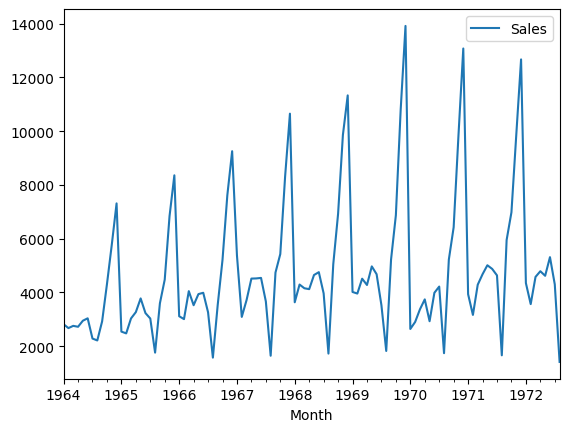

In [12]:
df.plot()

In [13]:
### Testing for Staionarity
from statsmodels.tsa.stattools import adfuller

In [14]:
test_result=adfuller(df['Sales'])

In [15]:
#Ho: It is non Stationary
#H1: It is Stationary
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <= 0.05:
        print("Strong evidence agints the null hypothesis(Ho),reject the null hypothesis. Data has non")
    else:
        print("Weak evidence against null hypothesis , time series has a unit root, indicating it is non")

In [16]:
adfuller_test(df['Sales'])

ADF Test Statistic:-1.763653121718514
p-value:0.3986502906962077
#Lags Used:11
Number of Observations Used:92
Weak evidence against null hypothesis , time series has a unit root, indicating it is non


# Differencing

In [17]:
df['Sales First Difference']=df['Sales']-df['Sales'].shift(1)

In [18]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(21)

In [19]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143.0,NaN
1964-03-01,2755,83.0,NaN
1964-04-01,2721,-34.0,NaN
1964-05-01,2946,225.0,NaN
1964-06-01,3036,90.0,NaN
1964-07-01,2282,-754.0,NaN
1964-08-01,2212,-70.0,NaN
1964-09-01,2922,710.0,NaN


In [20]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic:-0.8528730203392453
p-value:0.8030957961289699
#Lags Used:11
Number of Observations Used:71
Weak evidence against null hypothesis , time series has a unit root, indicating it is non


<Axes: xlabel='Month'>

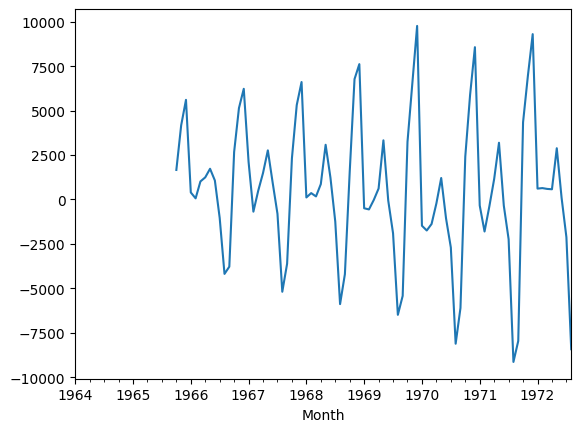

In [21]:
df['Seasonal First Difference'].plot()

# Auto Regressive Model

        

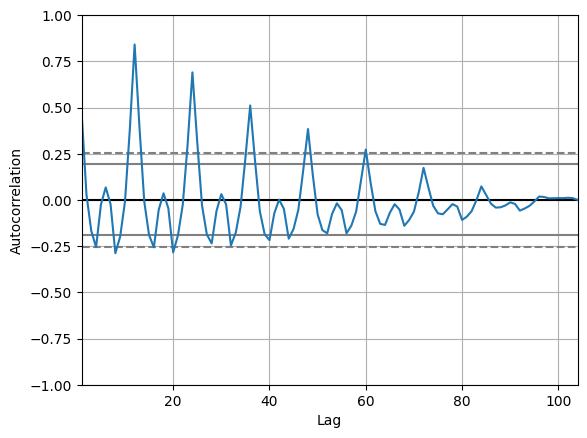

In [22]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

autocorrelation_plot(df['Sales'])
plt.show()


# Autocorrelation and Partial Autocorrelation

In [23]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

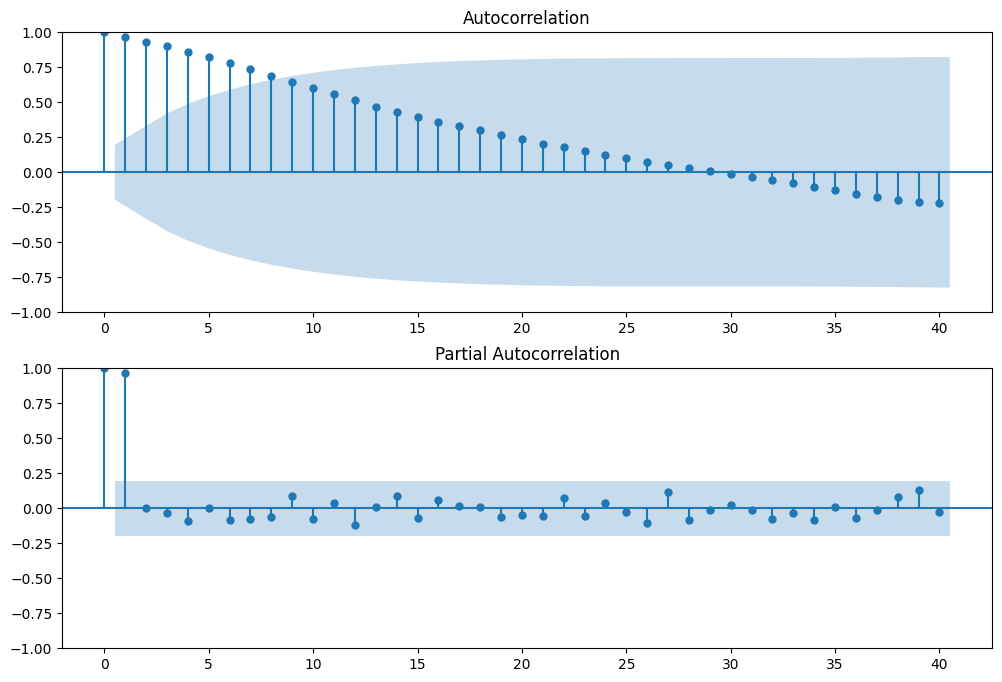

In [24]:
# Create a sample DataFrame with time series data
np.random.seed(42)  
data = np.random.randn(100).cumsum() 
df = pd.DataFrame(data, columns=['Seasonal First Difference'])

# Plot ACF and PACF
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
plot_acf(df['Seasonal First Difference'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
plot_pacf(df['Seasonal First Difference'], lags=40, ax=ax2)

plt.show()


In [25]:
import statsmodels.api as sm  # Corrected import
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Create a sample DataFrame with time series data
np.random.seed(42)
data = np.random.randn(100).cumsum() + 100  # Simulated Sales data
df = pd.DataFrame(data, columns=['Sales'])

# Fit the ARIMA model using statsmodels
model = ARIMA(df['Sales'], order=(1, 1, 1))  # Specify ARIMA order
model_fit = model.fit()

# Display summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -131.425
Date:                Tue, 10 Dec 2024   AIC                            268.850
Time:                        22:15:23   BIC                            276.635
Sample:                             0   HQIC                           272.000
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3996      5.648      0.071      0.944     -10.669      11.469
ma.L1         -0.4157      5.590     -0.074      0.941     -11.371      10.540
sigma2         0.8329      0.123      6.780      0.0

In [26]:
import statsmodels.api as sm  # Corrected import
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as pl


In [27]:
model = sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
result = model.fit()

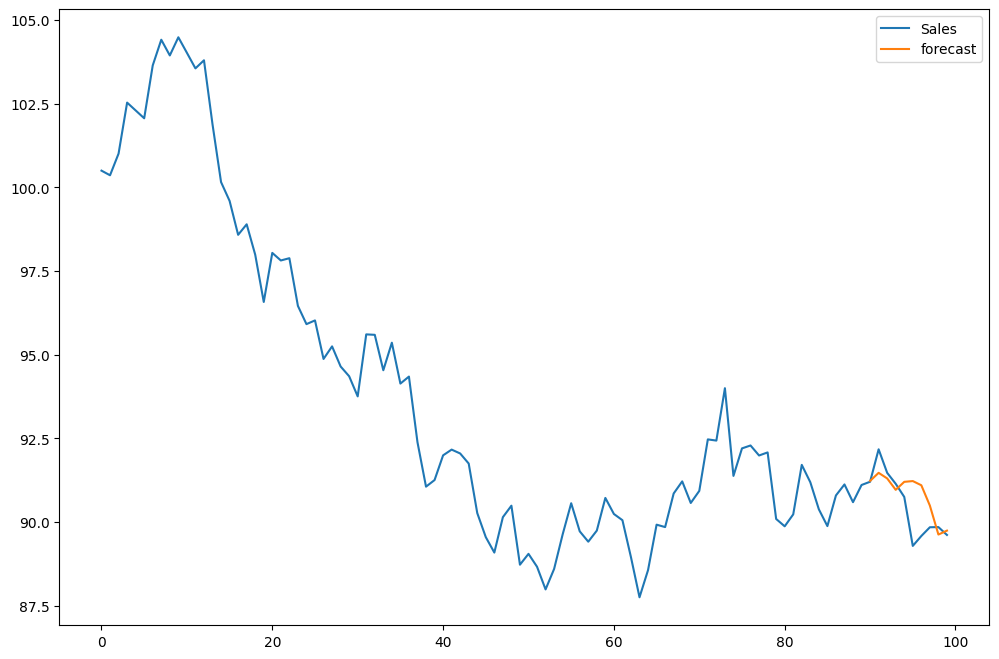

In [28]:
df['forecast'] = result.predict(start=90, end=103, dynamic=True)

# Plot Sales and Forecast
df[['Sales', 'forecast']].plot(figsize=(12, 8))
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19280\920092299.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range('2023-01-01', periods=100, freq='M')  # 100 months of data


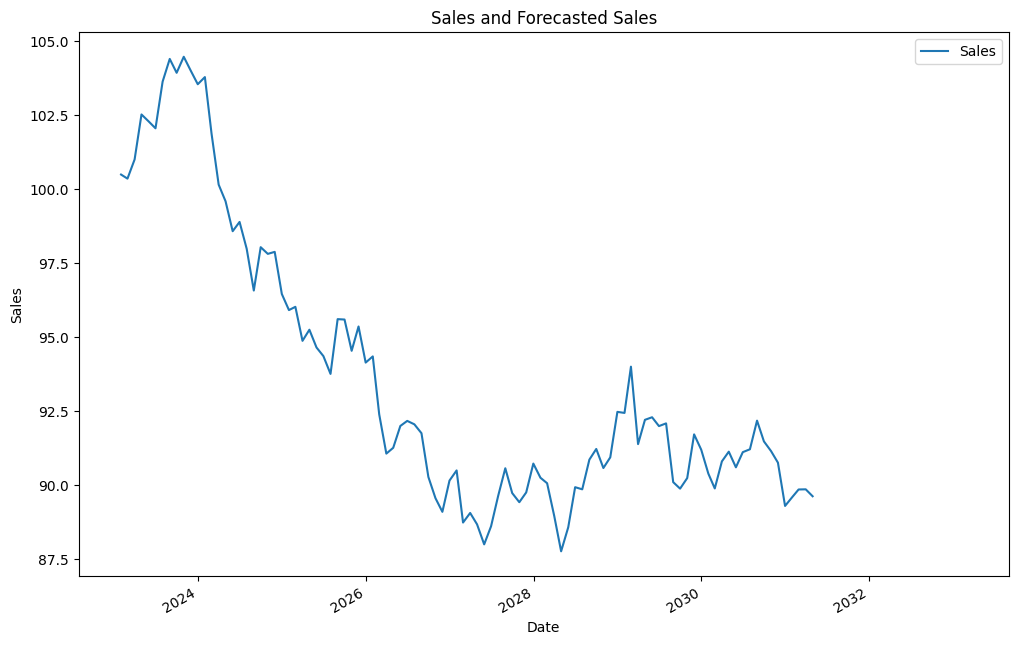

                Sales
2032-11-30  89.621154
2032-12-30        NaN
2033-01-30        NaN
2033-02-28  89.621154
2033-03-30        NaN


In [29]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Create a sample DataFrame with a time-based index
np.random.seed(42)
dates = pd.date_range('2023-01-01', periods=100, freq='M')  # 100 months of data
data = np.random.randn(100).cumsum() + 100  # Simulated Sales data
df = pd.DataFrame(data, columns=['Sales'], index=dates)

# Fit ARIMA model (adjust as necessary)
model = ARIMA(df['Sales'], order=(1, 1, 1))
result = model.fit()

# Generate future dates
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0, 24)]

# Create a DataFrame for the future dates
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=df.columns)

# Forecast the future values
future_dates_df['Sales'] = result.predict(start=len(df), end=len(df) + 23, dynamic=True)

# Combine the original data with the forecasted values
combined_df = pd.concat([df, future_dates_df])

# Plot the actual data and the forecasted values
combined_df[['Sales']].plot(figsize=(12, 8))
plt.title('Sales and Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Display the last few rows of the forecasted data
print(future_dates_df.tail())
